<a href="https://colab.research.google.com/github/clovisdanielss/Colab-Projects/blob/main/dogs-vs-cats/Dogs_Vs_Cats_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The dataset

The dataset can be found [here](https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip), and It contains 3000 images from cats and dogs. 
2000 for the training set, 1000 for the validation set. This notebook use as base an udacity notebook. 



### Objective

The main objective is to create a model for dogs/cats classification without overffiting. 

In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
zip_dir = tf.keras.utils.get_file("cats_and_dogs_filterted.zip", origin='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip', extract=True)

68616192/68606236 [==============================] - 0s 0us/step


In [3]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [4]:
train_dir

'/root/.keras/datasets/cats_and_dogs_filtered/train'

In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [6]:
train_cats_dir

'/root/.keras/datasets/cats_and_dogs_filtered/train/cats'

In [7]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [8]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [21]:
batch_size = 100
image_size = (150,150)

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255).flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=image_size,
    class_mode="binary"
)
val_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255).flow_from_directory(
    batch_size=batch_size,
    directory=validation_dir,
    shuffle=True,
    target_size=image_size,
    class_mode="binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
def plot_images(imgs):
  fig, axes = plt.subplots(1, 5, figsize=(20,20))
  #axes = axes.flatten()
  for img, ax in zip(imgs, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

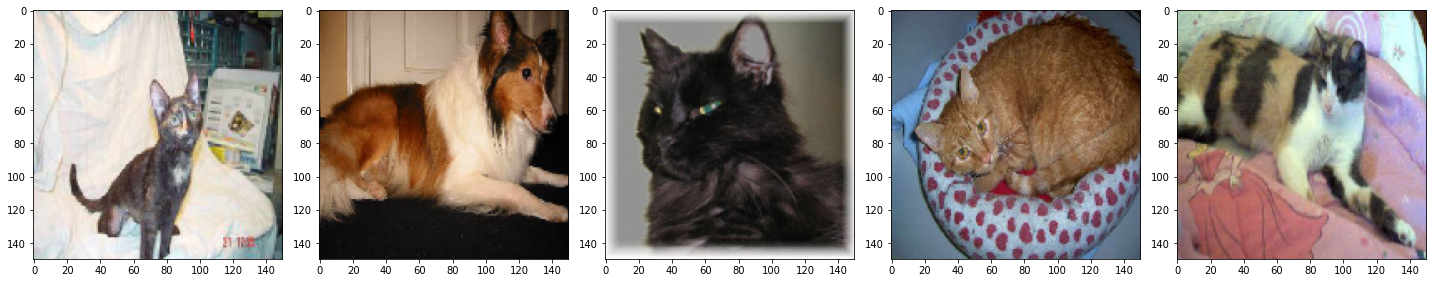

In [23]:
plot_images(train_gen[0][0][:5])

In [15]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), input_shape=[image_size[0], image_size[1], 3], activation="relu", padding="same"),
  tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=3),

  tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
  tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=3),

  tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
  tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=3),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation="relu"),
  tf.keras.layers.Dense(2, activation="softmax")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 5, 128)       

In [25]:
import math
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
log = model.fit_generator(
    train_gen,
    epochs=50,
    validation_data=val_gen,
    steps_per_epoch=math.ceil(total_train/batch_size),
    validation_steps=math.ceil(total_val/batch_size)
  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


20/20 [==============================] - 9s 432ms/step - loss: 0.6445 - accuracy: 0.6695 - val_loss: 0.5992 - val_accuracy: 0.6860
Epoch 2/50
20/20 [==============================] - 8s 408ms/step - loss: 0.5262 - accuracy: 0.7530 - val_loss: 0.5617 - val_accuracy: 0.7090
Epoch 3/50
20/20 [==============================] - 8s 407ms/step - loss: 0.4532 - accuracy: 0.7860 - val_loss: 0.5575 - val_accuracy: 0.7300
Epoch 4/50
20/20 [==============================] - 8s 408ms/step - loss: 0.4363 - accuracy: 0.7905 - val_loss: 0.5004 - val_accuracy: 0.7440
Epoch 5/50
20/20 [==============================] - 8s 407ms/step - loss: 0.3752 - accuracy: 0.8335 - val_loss: 0.5093 - val_accuracy: 0.7690
Epoch 6/50
20/20 [==============================] - 8s 407ms/step - loss: 0.3429 - accuracy: 0.8530 - val_loss: 0.4936 - val_accuracy: 0.7660
Epoch 7/50
20/20 [==============================] - 8s 401ms/step - loss: 0.2816 - accuracy: 0.8840 - val_loss: 0.4936 - val_accuracy: 0.7760
Epoch 8/50
20/20 

In [29]:
log.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

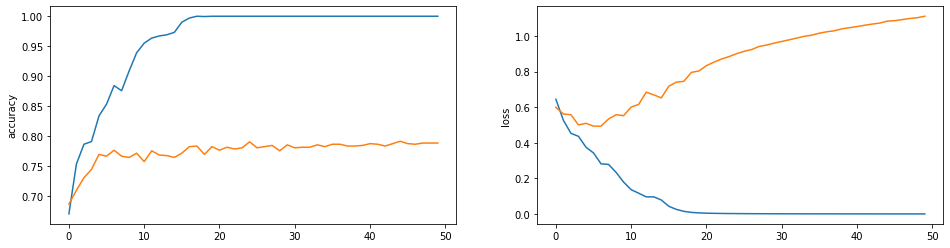

In [40]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(range(len(log.history["accuracy"])),log.history["accuracy"])
plt.ylabel("accuracy")
plt.plot(range(len(log.history["val_accuracy"])),log.history["val_accuracy"])
plt.subplot(1,2,2)
plt.plot(range(len(log.history["loss"])),log.history["loss"])
plt.ylabel("loss")
plt.plot(range(len(log.history["val_loss"])),log.history["val_loss"])

### As you can see

As you can see in this example we overffit the model. Now we will rebuild the model using dropout layer and data augumentation.

In [41]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        fill_mode="nearest",
        horizontal_flip=True,
        rotation_range=40,
        width_shift_range=.2,
        height_shift_range=.2,
        shear_range=.2,
        zoom_range=.2,
    ).flow_from_directory(
        batch_size=batch_size,
        directory=train_dir,
        shuffle=True,
        target_size=image_size,
        class_mode="binary"
)
val_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255).flow_from_directory(
    batch_size=batch_size,
    directory=validation_dir,
    shuffle=True,
    target_size=image_size,
    class_mode="binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Check the images using data augumentation

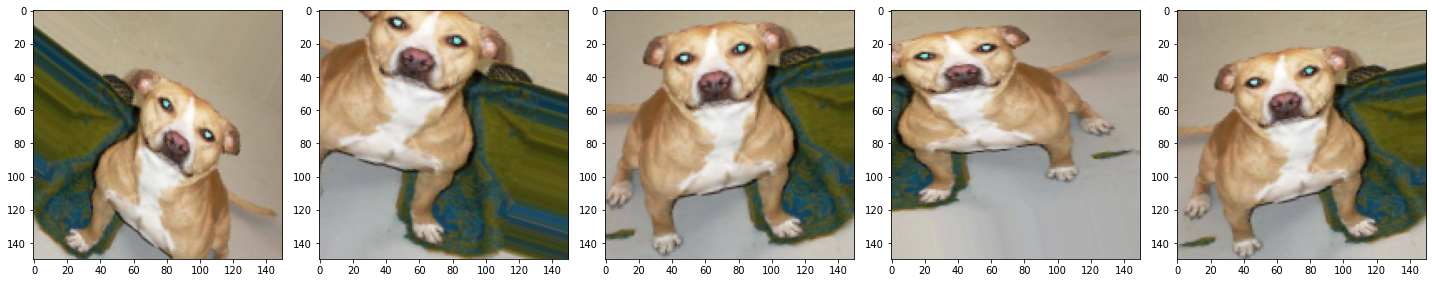

In [47]:
plot_images([train_gen[0][0][0] for i in range(5)])

### Train Vs Validation

Validation data does not need to be augumented, since It'll be the data as we recieve. The training data must be augumented. 

In [42]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), input_shape=[image_size[0], image_size[1], 3], activation="relu", padding="same"),
  tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=3),

  tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
  tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=3),

  tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
  tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=3),

  tf.keras.layers.Dropout(.5),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation="relu"),
  tf.keras.layers.Dense(2, activation="softmax")
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 128)       

In [43]:
import math
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
log = model.fit_generator(
    train_gen,
    epochs=50,
    validation_data=val_gen,
    steps_per_epoch=math.ceil(total_train/batch_size),
    validation_steps=math.ceil(total_val/batch_size)
  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


20/20 [==============================] - 17s 818ms/step - loss: 0.7222 - accuracy: 0.5080 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 2/50
20/20 [==============================] - 16s 828ms/step - loss: 0.6933 - accuracy: 0.4970 - val_loss: 0.6896 - val_accuracy: 0.5040
Epoch 3/50
20/20 [==============================] - 16s 800ms/step - loss: 0.6884 - accuracy: 0.5410 - val_loss: 0.6803 - val_accuracy: 0.5610
Epoch 4/50
20/20 [==============================] - 16s 797ms/step - loss: 0.6916 - accuracy: 0.5375 - val_loss: 0.6790 - val_accuracy: 0.5910
Epoch 5/50
20/20 [==============================] - 16s 803ms/step - loss: 0.6719 - accuracy: 0.6000 - val_loss: 0.6426 - val_accuracy: 0.6260
Epoch 6/50
20/20 [==============================] - 16s 797ms/step - loss: 0.6530 - accuracy: 0.6225 - val_loss: 0.6299 - val_accuracy: 0.6490
Epoch 7/50
20/20 [==============================] - 16s 801ms/step - loss: 0.6614 - accuracy: 0.6180 - val_loss: 0.6275 - val_accuracy: 0.6610
Epoch 8/50

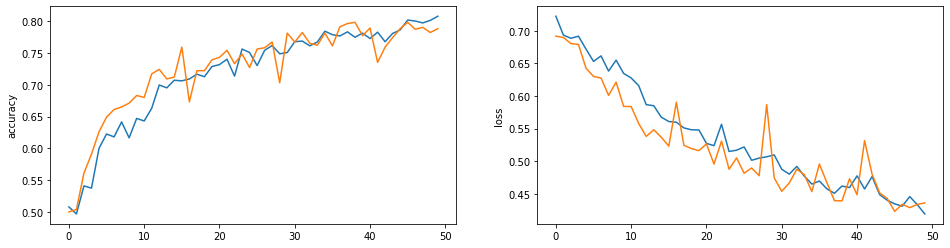

In [44]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(range(len(log.history["accuracy"])),log.history["accuracy"])
plt.ylabel("accuracy")
plt.plot(range(len(log.history["val_accuracy"])),log.history["val_accuracy"])
plt.subplot(1,2,2)
plt.plot(range(len(log.history["loss"])),log.history["loss"])
plt.ylabel("loss")
plt.plot(range(len(log.history["val_loss"])),log.history["val_loss"])

### As you can see

Again, as you can see, the overfitting problem was solved when using techiniques such as dropout and data augumentation.

In [46]:
model.save("dogs-vs-cats.h5")
model.save_weights("dogs-vs-cats-weights.h5")
!pip install tensorflowjs
!clear
!tensorflowjs_converter --input_format keras dogs-vs-cats.h5 ./dogs-vs-cats/
from google.colab import files
files.download("dogs-vs-cats/group1-shard1of2.bin")
files.download("dogs-vs-cats/group1-shard2of2.bin")
files.download("dogs-vs-cats/model.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>